### Import Liabraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Delete Warnings

In [35]:
import warnings
warnings.filterwarnings('ignore')

### Import Data

In [ ]:
data = pd.read_csv(r'C:\Users\m\Desktop\ML code\Mall_Customers.csv')

### Data Preprocessing

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [12]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [15]:
data.duplicated().sum()

np.int64(0)

In [17]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [18]:
df=data[["Age","Annual Income (k$)","Spending Score (1-100)"]]

### scaling

In [21]:
from sklearn.preprocessing import StandardScaler

scalor=StandardScaler()
df_scaled=scalor.fit_transform(df)

### Hyperparameter Tuning


In [38]:
from sklearn.mixture import GaussianMixture

bic_scores = []
n_components_range = range(1,7)
for n in n_components_range :
    gmm = GaussianMixture(n_components = n,random_state=42)
    gmm.fit(df_scaled)
    bic_scores.append(gmm.bic(df_scaled))   

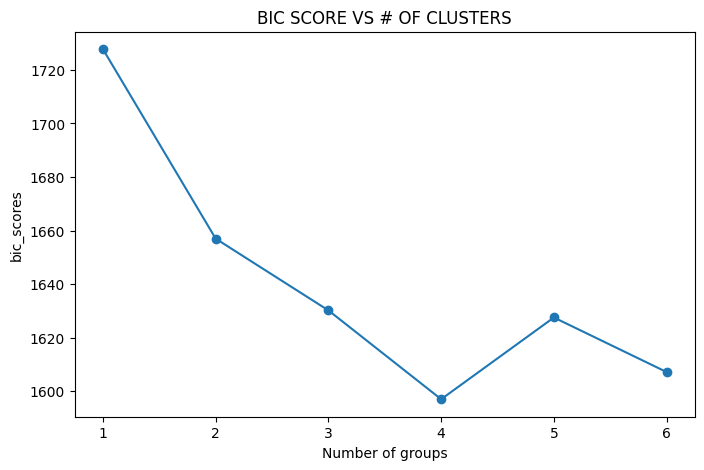

In [40]:
plt.figure(figsize=(8,5))
plt.plot(range(1, 7), bic_scores, marker='o')
plt.title('BIC SCORE VS # OF CLUSTERS')
plt.xlabel('Number of groups')
plt.ylabel('bic_scores')
plt.show()

### Optimal # of Clusters

In [52]:
optimal_n=n_components_range[np.argmin(bic_scores)]
optimal_n

4

### Model Implementaion

In [58]:
gmm = GaussianMixture(n_components = optimal_n,random_state=42)
gmm.fit(df_scaled)
labels = gmm.predict(df_scaled)


### Add labels to the orignal data 

In [59]:
labels

array([0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 1, 2, 1, 3, 1, 3, 1, 3, 1,
       2, 1, 3, 1, 3, 1, 2, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [61]:
data['Cluster '] = labels

In [62]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,2
2,3,Female,20,16,6,0
3,4,Female,23,16,77,2
4,5,Female,31,17,40,0


### Evaluation

In [ ]:
from sklearn.metrics import silhouette_score

s = silhouette_score(df_scaled,labels) # tends to 1
log_likelihood = gmm.score(df_scaled) # tends to 0- from negative # shows how will the data is analysed
print(s)
print(log_likelihood)


0.3734466371028913
-3.4759118501951014


### GMM internal parameters

In [ ]:
print (f"means :\n {gmm.means_}")#ceter of the cluster
print("________________________")
print (f"weight :\n {gmm.weights_}")#ratio of the cluster
print("________________________")
print (f"covariance :\n {gmm.covariances_}")#matrix of contrast

means :
 [[ 0.79464628 -0.54962867 -0.35481071]
 [-0.44613802  0.99355244  1.23976564]
 [-1.03593668 -0.61886752  0.41229644]
 [ 0.28311654  1.07579503 -1.26037493]]
________________________
weight :
 [0.38424019 0.19307202 0.25690258 0.16578522]
________________________
covariance :
 [[[ 0.78287365  0.13493598  0.08572747]
  [ 0.13493598  0.34624238  0.26068378]
  [ 0.08572747  0.26068378  0.37784159]]

 [[ 0.06892068 -0.01825704  0.01380084]
  [-0.01825704  0.38510762 -0.00740371]
  [ 0.01380084 -0.00740371  0.13218388]]

 [[ 0.12844383 -0.05986139  0.05123801]
  [-0.05986139  0.50374177 -0.46317164]
  [ 0.05123801 -0.46317164  0.58943425]]

 [[ 0.49965689 -0.04304606  0.04834626]
  [-0.04304606  0.39971377  0.04670847]
  [ 0.04834626  0.04670847  0.15511394]]]
